# Prodaja nepremičnin
#### Projektna naloga pri predmetu Programiranje 1

## 0. Uvažanje podatkov

Preden začnemo z obdelavo podatkov, le-te uvozimo.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20

pot = os.path.join('zajeti_podatki', 'nepremicnine.csv')
nepremicnine = pd.read_csv(pot)
nepremicnine

,id,regija,upravna_enota,obcina,kraj,povrsina,vrsta_hise,leto,adaptirana,zemljisce,cena
0,6342774,Dolenjska,Črnomelj,Črnomelj,ADLEŠIČI,366.33,samostojna,2007,NaN,1408.0,340000.0
1,6365305,S.Primorska,Ajdovščina,Ajdovščina,AJDOVŠČINA,177.80,samostojna,1965,2019.0,437.0,199000.0
2,6280153,S.Primorska,Ajdovščina,Ajdovščina,AJDOVŠČINA,223.20,samostojna,1995,NaN,887.0,155000.0
3,6367285,S.Primorska,Ajdovščina,Ajdovščina,AJDOVŠČINA,247.80,samostojna,2020,NaN,233.0,240900.0
4,6351944,S.Primorska,Ajdovščina,Ajdovščina,AJDOVŠČINA,262.00,samostojna,2011,NaN,362.0,305000.0
...,...,...,...,...,...,...,...,...,...,...,...
4973,6168603,Dolenjska,Novo mesto,Žužemberk,"ŽUŽEMBERK, CENTER",239.00,dvostanovanjska,1825,1986.0,676.0,129000.0
4974,6207406,Dolenjska,Novo mesto,Žužemberk,"ŽUŽEMBERK, VELIKI LIPOVEC",120.00,samostojna,1994,NaN,1699.0,140000.0
4975,6366857,Dolenjska,Novo mesto,Žužemberk,"ŽUŽEMBERK, ŽUŽEBERK - SELA PRI AJDOVCU",300.00,samostojna,1997,NaN,112854.0,100000.0
4976,6288513,Podravska,Ormož,Ormož,ŽVAB,550.00,hiša,1747,2005.0,5226.0,110000.0


## 1. Obdelava podatkov

Za začetek izbrišemo vse tiste vrstice, pri katerih manjkata podatka o ceni ali površini hiše; take objekte namreč težko upoštevamo pri nadaljnji analizi, saj sta le-ta podatka ključna. Prav tako zaradi konsistence preimenujemo stolpec s podatkom o letu izgradnje.

In [2]:
nepremicnine = nepremicnine[nepremicnine.cena.notnull()]
nepremicnine = nepremicnine[nepremicnine.povrsina.notnull()]
nepremicnine.rename(columns = {"leto": "zgrajena"}, inplace=True)

Da se izognemo napakah pri izračunih, na mestih, manjkajoče podatke za velikost zemljišča nadomestimo z 0, podatke za leto pa pretvorimo v cela števila.

In [3]:
nepremicnine["zemljisce"] = nepremicnine["zemljisce"].fillna(0)
nepremicnine["adaptirana"] = nepremicnine["adaptirana"].astype('Int64')

Nato dodamo nov stolpec z izračunanimi cenami kvadratnega metra nepremičnine. Povsod kjer bomo omenjali ceno nepremičnine, bomo upoštevali ceno kvadratnega metra objekta in ne njegove absolutne cene, saj s tem najlažje primerjamo različne nepremičnine med sabo.

In [4]:
povrsina = nepremicnine["povrsina"] + nepremicnine["zemljisce"]
cena = nepremicnine["cena"]
cena_na_m2 = cena / povrsina
nepremicnine["cena_na_m2"] = cena_na_m2

Prav tako dodamo tudi stolpca s podatkom o desetletju, v katerem je bila hiša zgrajena oz. obnovljena

In [5]:
nepremicnine["desetletje_zgrajena"] = nepremicnine.zgrajena // 10 * 10
nepremicnine["desetletje_adaptirana"] = nepremicnine.adaptirana // 10 * 10
nepremicnine

,id,regija,upravna_enota,obcina,kraj,povrsina,vrsta_hise,zgrajena,adaptirana,zemljisce,cena,cena_na_m2,desetletje_zgrajena,desetletje_adaptirana
0,6342774,Dolenjska,Črnomelj,Črnomelj,ADLEŠIČI,366.33,samostojna,2007,<NA>,1408.0,340000.0,191.621626,2000,<NA>
1,6365305,S.Primorska,Ajdovščina,Ajdovščina,AJDOVŠČINA,177.80,samostojna,1965,2019,437.0,199000.0,323.682498,1960,2010
2,6280153,S.Primorska,Ajdovščina,Ajdovščina,AJDOVŠČINA,223.20,samostojna,1995,<NA>,887.0,155000.0,139.614484,1990,<NA>
3,6367285,S.Primorska,Ajdovščina,Ajdovščina,AJDOVŠČINA,247.80,samostojna,2020,<NA>,233.0,240900.0,501.039933,2020,<NA>
4,6351944,S.Primorska,Ajdovščina,Ajdovščina,AJDOVŠČINA,262.00,samostojna,2011,<NA>,362.0,305000.0,488.782051,2010,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,6168603,Dolenjska,Novo mesto,Žužemberk,"ŽUŽEMBERK, CENTER",239.00,dvostanovanjska,1825,1986,676.0,129000.0,140.983607,1820,1980
4974,6207406,Dolenjska,Novo mesto,Žužemberk,"ŽUŽEMBERK, VELIKI LIPOVEC",120.00,samostojna,1994,<NA>,1699.0,140000.0,76.965366,1990,<NA>
4975,6366857,Dolenjska,Novo mesto,Žužemberk,"ŽUŽEMBERK, ŽUŽEBERK - SELA PRI AJDOVCU",300.00,samostojna,1997,<NA>,112854.0,100000.0,0.883751,1990,<NA>
4976,6288513,Podravska,Ormož,Ormož,ŽVAB,550.00,hiša,1747,2005,5226.0,110000.0,19.044321,1740,2000


## 2. Analiza podatkov
Ko smo podatke ustrezno preuredili lahko pričnemo z njihovo analizo. Pri tej se bomo osredotočali na nekaj glavnih informacij o nepremičnini: leto izgradnje in prenove, velikost hiše in zemljišča, vrsta objekta in njegova cena. Pri tem bomo poskušali ugotoviti kako so si ti med sabo odvisni, predvsem pa, kako vplivajo na končno ceno nepremičnine.

### 2.1 Starost in velikost nepremičnine
Za začetek tega razdelka si poglejmo, koliko so v povprečju stare hiše v Sloveniji po različnih regijah, kdaj so bile adaptirane in v katerih letih jih je bilo zgrajenih največ.

In [27]:
nepremicnine[["zgrajena", "adaptirana"]].mean().round().astype(int)

zgrajena      1969
adaptirana    2003
dtype: int32

In [7]:
nepremicnine.groupby("regija")["zgrajena"].mean().sort_values().round().astype(int)

regija
Notranjska      1923
S.Primorska     1949
J. Primorska    1951
Dolenjska       1961
Zasavska        1962
Posavska        1963
Pomurska        1965
Gorenjska       1966
Koroška         1966
Savinjska       1968
Podravska       1973
LJ-mesto        1986
LJ-okolica      1988
Name: zgrajena, dtype: int32

In [8]:
nepremicnine.groupby("regija")["adaptirana"].mean().sort_values().round().astype(int)

regija
Notranjska      1964
S.Primorska     1998
Dolenjska       2000
Zasavska        2002
Gorenjska       2003
J. Primorska    2004
Posavska        2005
Savinjska       2006
Podravska       2006
Koroška         2006
LJ-okolica      2007
Pomurska        2007
LJ-mesto        2008
Name: adaptirana, dtype: int32

Iz podatkov je razvidno, da so najmlajše hiše zgrajene v Ljubljani in njeni okolici, Podravski ter Savinjski regiji, najstarejše na Notranjskem ter Primorskem; če pogledamo povprečna leta obnov, pa opazimo, da se največ obnov v novejšem času dogaja v Ljubljani, na Pomurskem in Koroškem, hiše na Notranjskem pa kvečjemu ostajajo nespremenjene ali pa so bile obnovljene že pred leti.

<AxesSubplot:title={'center':'Število zgrajenih hiš skozi čas'}, xlabel='Desetletje izgradnje', ylabel='Število'>

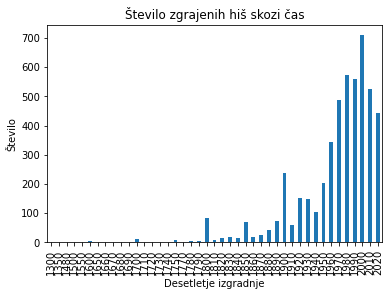

In [9]:
nepremicnine.groupby("desetletje_zgrajena").size().plot.bar(xlabel="Desetletje izgradnje", ylabel="Število", title="Število zgrajenih hiš skozi čas")

Iz zgornjega grafa lahko razberemo, da najstarejši prodajani objekti segajo vse do leta 1300, ampak se bomo za nadaljnjo analizo skoncentrirali na tiste zgrajene po letu 1850, saj jih je bilo velika večina zgrajenih v tem času.

<AxesSubplot:title={'center':'Število zgrajenih hiš po letu 1850'}, xlabel='Desetletje izgradnje', ylabel='Število'>

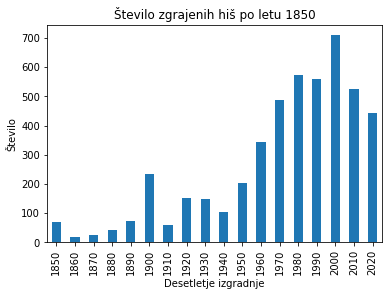

In [10]:
novejse_hise = nepremicnine[(nepremicnine.zgrajena >= 1850) & ((nepremicnine.adaptirana >=1850)|(nepremicnine.adaptirana.isnull()))]
novejse_hise.groupby("desetletje_zgrajena").size().plot.bar(xlabel="Desetletje izgradnje", ylabel="Število", title="Število zgrajenih hiš po letu 1850")

<AxesSubplot:title={'center':'Število adaptiranih hiš skozi čas'}, xlabel='Desetletje adaptacije', ylabel='Število'>

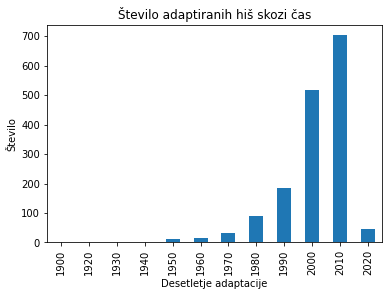

In [11]:
novejse_hise.groupby("desetletje_adaptirana").size().plot.bar(xlabel="Desetletje adaptacije", ylabel="Število", title="Število adaptiranih hiš skozi čas")

Kot je razvidno iz zgornjih grafov, je bilo največ hiš zgrajenih v letih 1980 do 2010, nekoliko več okoli leta 2000, starejše hiše pa so povečini začeli obnavljati šele okoli leta 2000, vrh obnov je dosežen po letu 2010.

Sedaj pa poglejmo, kako je velikost hiše in morebitnega dodatnega zemljišča odvisna od njene starosti.

<AxesSubplot:title={'center':'Površina hiš skozi čas'}, xlabel='Desetletje izgradnje', ylabel='Površina'>

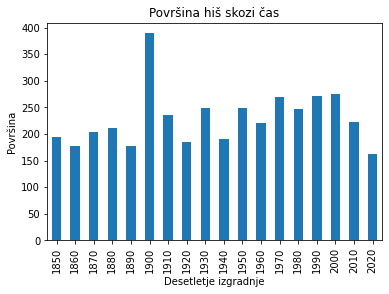

In [12]:
novejse_hise.groupby("desetletje_zgrajena")["povrsina"].mean().plot.bar(xlabel="Desetletje izgradnje", ylabel="Površina", title="Površina hiš skozi čas")

<AxesSubplot:title={'center':'Velikost zemljišča skozi čas'}, xlabel='Desetletje izgradnje', ylabel='Zemljišče'>

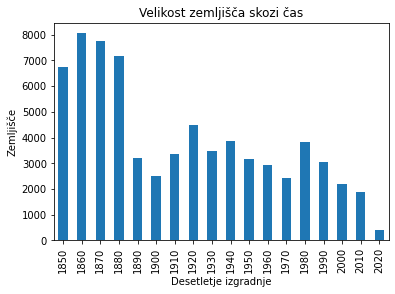

In [13]:
novejse_hise.groupby("desetletje_zgrajena")["zemljisce"].mean().plot.bar(xlabel="Desetletje izgradnje", ylabel="Zemljišče", title="Velikost zemljišča skozi čas")

Kot bi lahko pričakovali, je površina zemljišča skozi leta upadala, torej, starejša kot je hiša, večje zemljišče ima. Površina posameznega objekta pa se je čez leta le malo spreminjala, v povprečju je rahlo naraščala, izstopa pa leto 1900, ko so imele hiše skoraj dvakrat večjo površino.

Za konec tega razdelka pa pa poskušajmo ugotoviti, kako je cena nepremičnine odvisna od njene starosti oz leta adaptacije.

Primerjajmo hiše, ki so bile skozi leta kdaj prenovljene in tiste, ki niso.
Leva grafikona predstavljata tiste nepremičnine, ki niso bile obnovljene, desna tiste, ki so bile skozi leta obnovljene; zgornja predstavljata vse hiše in njihove cene na kvadratni meter skozi čas, spodnja dva pa povprečno ceno nepremičnine na kvadratni meter.

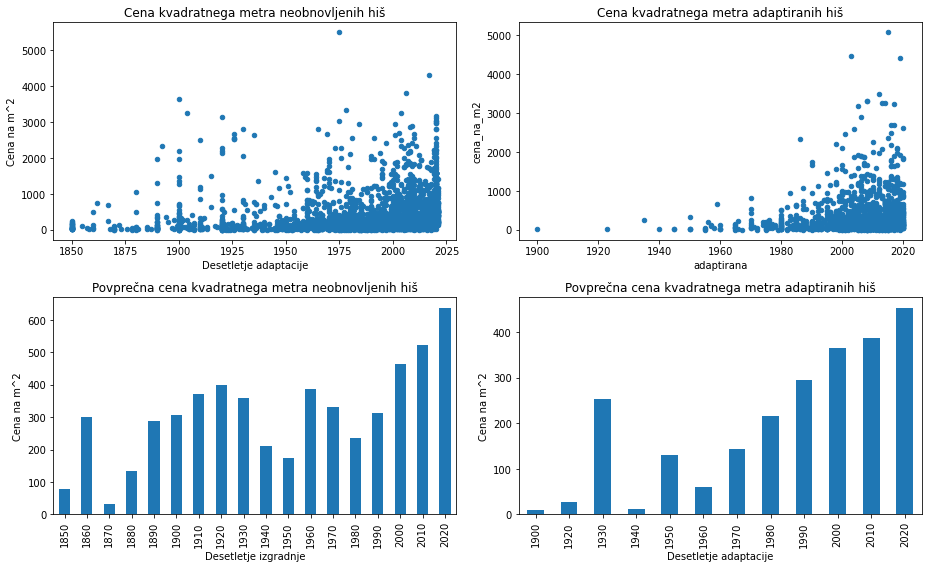

In [14]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(13,8))
novejse_hise[novejse_hise.adaptirana.isnull()].plot.scatter(x="zgrajena", y="cena_na_m2", title="Cena kvadratnega metra neobnovljenih hiš", ax=ax1)
ax1.set_xlabel("Desetletje izgradnje")
ax1.set_ylabel("Cena na m^2")
novejse_hise[novejse_hise.adaptirana.notnull()].plot.scatter(x="adaptirana", y="cena_na_m2", title="Cena kvadratnega metra adaptiranih hiš", xlabel="Leto adaptacije", ylabel="Cena na m^2", ax=ax2)
ax1.set_xlabel("Desetletje adaptacije")
ax1.set_ylabel("Cena na m^2")
novejse_hise[novejse_hise.adaptirana.isnull()].groupby("desetletje_zgrajena")["cena_na_m2"].mean().plot.bar(xlabel="Desetletje izgradnje", ylabel="Cena na m^2", title="Povprečna cena kvadratnega metra neobnovljenih hiš", ax=ax3)
novejse_hise[novejse_hise.adaptirana.notnull()].groupby("desetletje_adaptirana")["cena_na_m2"].mean().plot.bar(xlabel="Desetletje adaptacije", ylabel="Cena na m^2", title="Povprečna cena kvadratnega metra adaptiranih hiš", ax=ax4)
plt.tight_layout()
plt.show()

Kljub temu, da bi se mogoče zazdelo, da bodo adaptirane hiše v povprečju dražje, lahko na podlagi podatkov opazimo, da je povprečna cena prenovljenih hiš še vedno nižja od nikoli prenovljenih. To je najverjetneje posledica tega, da so adaptirane hiše v povprečju starejše in kljub prenovi ne morejo doseči cen novih hiš.

Lahko zaključimo, da cena nepremičnin z leti venomer narašča, njihovo število pa v zadnjih letih rahlo upada.

### 2.2 Lokacija nepremičnine
V naslednjem razdelku si podrobneje poglejmo lokacije nepremičnin - v katerih regijah/občinah se prodaja največ nepremičnin, kako lokacija vpliva na površino same hiše in zemljišča ter kakšne so cene nepremičnin v posameznih regijah.

In [15]:
nepremicnine.groupby("regija").size().sort_values()

regija
Zasavska         33
Koroška          81
Notranjska      130
Posavska        178
Pomurska        270
S.Primorska     272
Dolenjska       323
Gorenjska       367
LJ-mesto        540
Savinjska       588
J. Primorska    608
Podravska       768
LJ-okolica      816
dtype: int64

In [16]:
nepremicnine.groupby("obcina").size().sort_values().tail(10)

obcina
Sežana        78
Ptuj          81
Brežice       90
Domžale       95
Kranj         99
Vrhnika      103
Piran        138
Maribor      172
Koper        210
Ljubljana    540
dtype: int64

Kot vidimo, se največ nepremičnin prodaja v večjih slovenskih mestih in njihovi okolici (Ljubljana z okolico, Maribor, Koper ipd.).

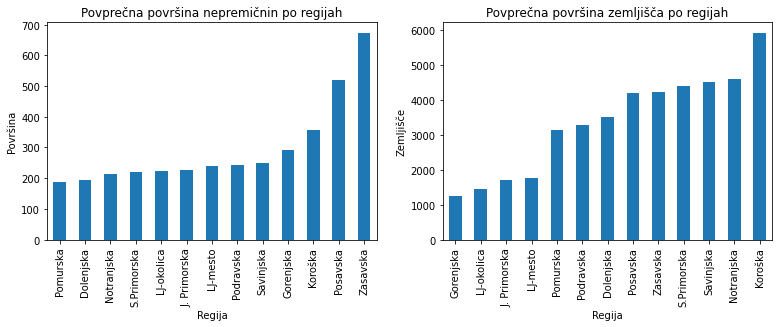

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,4))
nepremicnine.groupby("regija")["povrsina"].mean().sort_values().plot.bar(xlabel="Regija", ylabel="Površina", title="Povprečna površina nepremičnin po regijah", ax=ax1)
nepremicnine.groupby("regija")["zemljisce"].mean().sort_values().plot.bar(xlabel="Regija", ylabel="Zemljišče", title="Povprečna površina zemljišča po regijah", ax=ax2)
plt.show()

<AxesSubplot:title={'center':'Povprečna cena kvadratnega metra nepremičnine po regijah'}, xlabel='Regija', ylabel='Povprečna cena kvadratnega metra'>

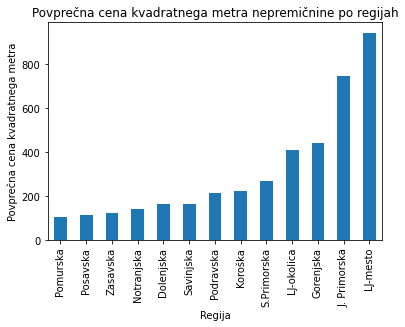

In [18]:
nepremicnine.groupby("regija")["cena_na_m2"].mean().sort_values().round().plot.bar(xlabel="Regija", ylabel="Povprečna cena kvadratnega metra", title="Povprečna cena kvadratnega metra nepremičnine po regijah")

Glede na te grafikone težko na splošno zaključimo, kako lokacija vpliva na površino in ceno, zato bomo komentirali posamezne regije, ki izstopajo.

Če začnemo z Ljubljano in okolico, so po pričakovanjih hiše majhne, skoraj nimajo zemljišča, cene pa so zelo visoke, dva do trikrat višje od ostalih regij.
Poleg nje izstopa tudi Koroška v drug ekstrem, hiše so velike, imajo velike posesti, cene pa so relativno majhne.
Po velikih površinah nepremičnin izstopa tudi Posavska regija, po velikost zemljišč izstopajo tudi Notranjska in Savinjska z velikimi površinami ter Gorenjska in J. Primorska z daleč najmanjšimi posestmi.
Veliko večje razlike se pojavljajo po cenah nepremičnin na kvadratni meter. Poleg LJubljane sta najdražji še J. Primorska in Gorenjska, Najcenejše pa Pomurska, Posavska in Zasavska regija. V povprečju je razlika med najdražjimi in najcenejšimi nepremičninami kar devet- do desetkratna.

### 2.3 Vrsta nepremičnine
Za na konec pa si še oglejmo vrste hiš in njihov vpliv na ceno, površino in na sploh njihovo število po posameznih regijah.

In [19]:
nepremicnine.groupby("vrsta_hise").size().sort_values()

vrsta_hise
trojček              19
atrijska             24
hiša                122
dvostanovanjska     224
dvojček             485
vrstna              498
samostojna         3602
dtype: int64

In [20]:
nepremicnine.groupby("vrsta_hise")["cena_na_m2"].mean().sort_values().round()

vrsta_hise
samostojna          275.0
hiša                307.0
atrijska            342.0
dvostanovanjska     357.0
dvojček             765.0
vrstna              832.0
trojček            1246.0
Name: cena_na_m2, dtype: float64

In [21]:
nepremicnine.groupby("vrsta_hise")["povrsina"].mean().sort_values().round()

vrsta_hise
trojček            159.0
dvojček            171.0
vrstna             178.0
atrijska           216.0
samostojna         262.0
dvostanovanjska    278.0
hiša               363.0
Name: povrsina, dtype: float64

Lahko zaključimo, da so dalec najbolj prodajane samostojne hiše, njihova cena pa je najnižja. Po ceni izstopajo tudi trojčki, katerih se prodaja najmanj in pa vrstne hiše, katerih popularnost je takoj za samostojnimi. Največjo površino imajo hiše (navadne hiše, brez kakršnihkoli posebnosti) ter dvostanovanjske in samostojne hiše.

Za na konec tega razdelka pa si še poglejmo kako se vrste hiš razlikuje po regijah in kakšna je njihova cena. V ta namen bomo izbrali nekaj posameznih regij in jih primerjali med sabo, podobno pa bi storili tudi za ostale.

##### Primerjava 1: Ljubljana in okolica

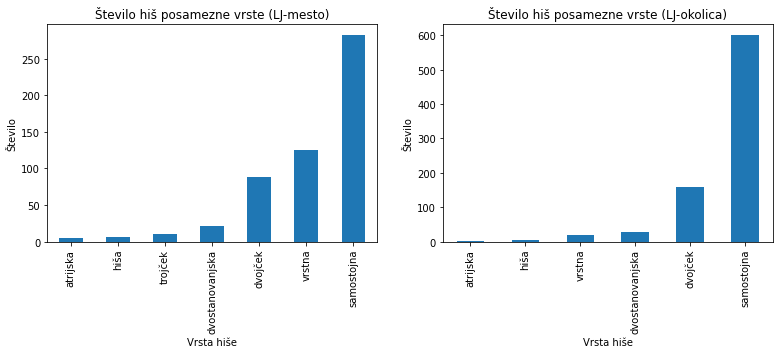

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,4))
nepremicnine.groupby(["regija", "vrsta_hise"]).size().sort_values()["LJ-mesto"].plot.bar(xlabel="Vrsta hiše", ylabel="Število", title="Število hiš posamezne vrste (LJ-mesto)", ax=ax1)
nepremicnine.groupby(["regija", "vrsta_hise"]).size().sort_values()["LJ-okolica"].plot.bar(xlabel="Vrsta hiše", ylabel="Število", title="Število hiš posamezne vrste (LJ-okolica)", ax=ax2)
plt.show()

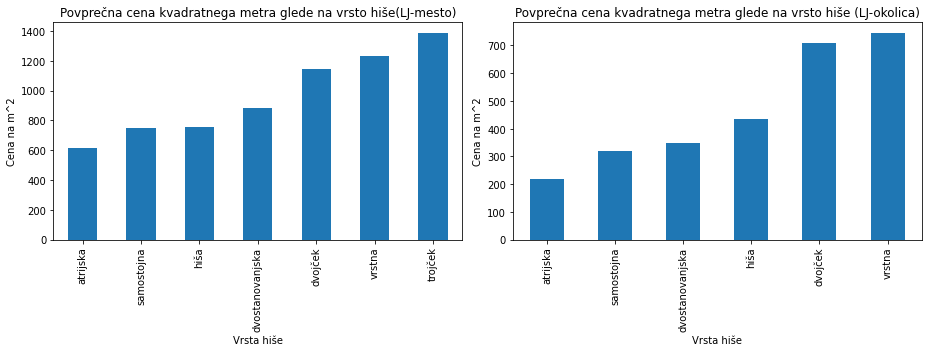

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,5))
nepremicnine.groupby(["regija", "vrsta_hise"])["cena_na_m2"].mean().sort_values()["LJ-mesto"].plot.bar(xlabel="Vrsta hiše", ylabel="Cena na m^2", title="Povprečna cena kvadratnega metra glede na vrsto hiše(LJ-mesto)", ax=ax1)
nepremicnine.groupby(["regija", "vrsta_hise"])["cena_na_m2"].mean().sort_values()["LJ-okolica"].plot.bar(xlabel="Vrsta hiše", ylabel="Cena na m^2", title="Povprečna cena kvadratnega metra glede na vrsto hiše (LJ-okolica)", ax=ax2)
plt.tight_layout()
plt.show()

Tako v Ljubljani kot v njeni okolici so najbolj prodajane samostojne hiše, s to raliko, da je povprečna cena samostojne hiše v Ljubljani skoraj trikrat večja kot v okolici. Od tu naprej, pa se številke razlikujejo. V sami Ljubljani so za samostojnimi popularne še vrstne hiše in dvojčki, po ceni so te tih za trojčki, ki so najdražji, v primerjavi z okolico pa so še vedno okoli dvakrat dražji. V okolici ljubljane pa so najbolj prodajani dvojčki, ki so po po ceni primerjlivi z vrstnimi hišami; te so v okolici najdražje.

Če zaključimo, so cene v samem mestu dvakrat, celo trikrat višje kot v okolici, samo število nepremičnin pa je temu primerno tudi manjše.

##### Primerjava 2: Gorenjska in Posavska

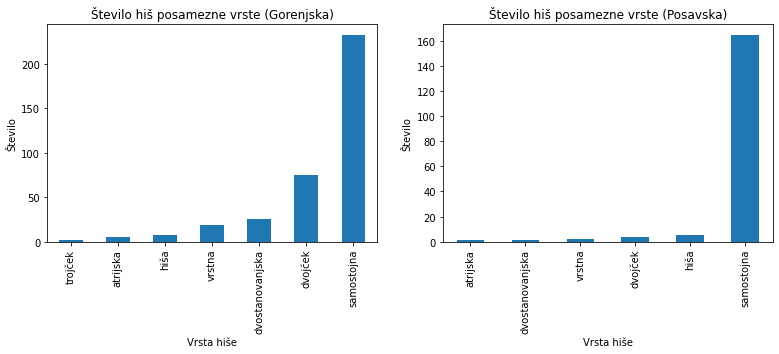

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,4))
nepremicnine.groupby(["regija", "vrsta_hise"]).size().sort_values()["Gorenjska"].plot.bar(xlabel="Vrsta hiše", ylabel="Število", title="Število hiš posamezne vrste (Gorenjska)", ax=ax1)
nepremicnine.groupby(["regija", "vrsta_hise"]).size().sort_values()["Posavska"].plot.bar(xlabel="Vrsta hiše", ylabel="Število", title="Število hiš posamezne vrste (Posavska)", ax=ax2)
plt.show()

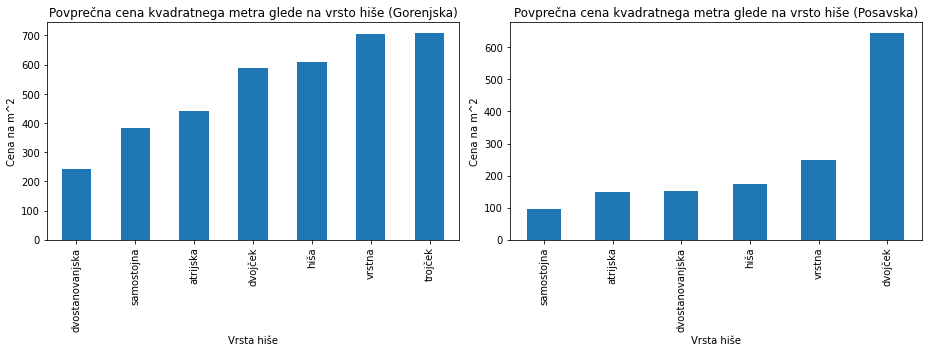

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,5))
nepremicnine.groupby(["regija", "vrsta_hise"])["cena_na_m2"].mean().sort_values()["Gorenjska"].plot.bar(xlabel="Vrsta hiše", ylabel="Cena na m^2", title="Povprečna cena kvadratnega metra glede na vrsto hiše (Gorenjska)", ax=ax1)
nepremicnine.groupby(["regija", "vrsta_hise"])["cena_na_m2"].mean().sort_values()["Posavska"].plot.bar(xlabel="Vrsta hiše", ylabel="Cena na m^2", title="Povprečna cena kvadratnega metra glede na vrsto hiše (Posavska)", ax=ax2)
plt.tight_layout()
plt.show()

Tako kot v primeru Ljubljane in okolice vidimo, da so samostojne hiše daleč najbolj prodajane. Cena le-leh je na Gorenjskem približno štirikrat višja. Na Posavskem se poleh samostojnih hiš prodaja le malo drugih, na Gorenjskem rahlo izstopajo tudi dvojčki.
Če primerjamo cene pa opazimo, da so cene dvojčkov v obeh regijah primerljive, vse ostale vrste pa so na Gorenjskem nekje dva- do trikrat dražje.